Cruelty-Free Cosmetics Data:
         Week  cruelty free cosmetics: (Worldwide)
0  2019-11-10                                   25
1  2019-11-17                                   28
2  2019-11-24                                   24
3  2019-12-01                                   25
4  2019-12-08                                   27 

Cruelty-Free Makeup Data:
         Week  cruelty free makeup: (Worldwide)
0  2019-11-10                                26
1  2019-11-17                                22
2  2019-11-24                                26
3  2019-12-01                                24
4  2019-12-08                                24 

Cruelty-Free Skincare Data:
         Week  cruelty free skincare: (Worldwide)
0  2019-11-10                                  17
1  2019-11-17                                  17
2  2019-11-24                                  13
3  2019-12-01                                  18
4  2019-12-08                                  12 

Vegan Cosmetics D

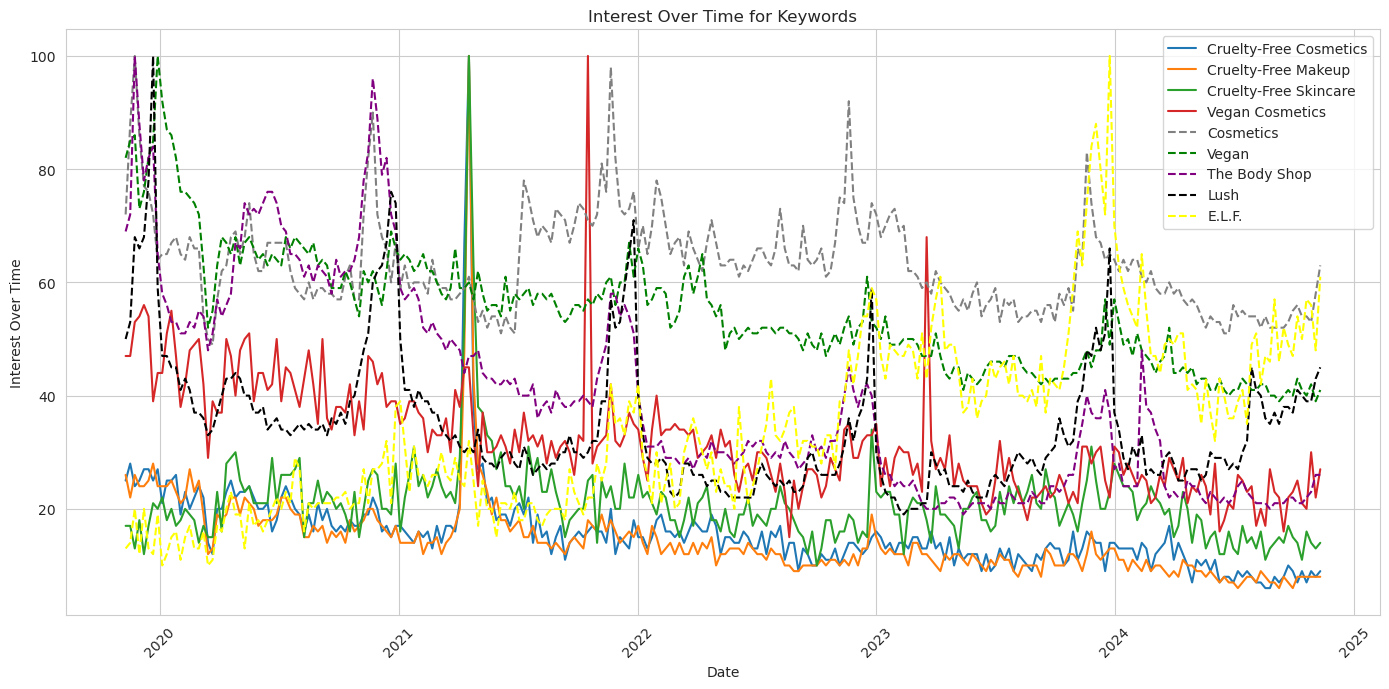

Correlation matrix:
                        cruelty_free_cosmetics  cruelty_free_makeup  \
cruelty_free_cosmetics                1.000000             0.950215   
cruelty_free_makeup                   0.950215             1.000000   
cruelty_free_skincare                 0.761470             0.770236   
vegan_cosmetics                       0.504387             0.522070   
cosmetics                             0.215562             0.217303   
vegan                                 0.527761             0.558928   
the_body_shop                         0.460487             0.504069   
lush                                  0.203511             0.271491   
elf                                  -0.382534            -0.404679   

                        cruelty_free_skincare  vegan_cosmetics  cosmetics  \
cruelty_free_cosmetics               0.761470         0.504387   0.215562   
cruelty_free_makeup                  0.770236         0.522070   0.217303   
cruelty_free_skincare                1

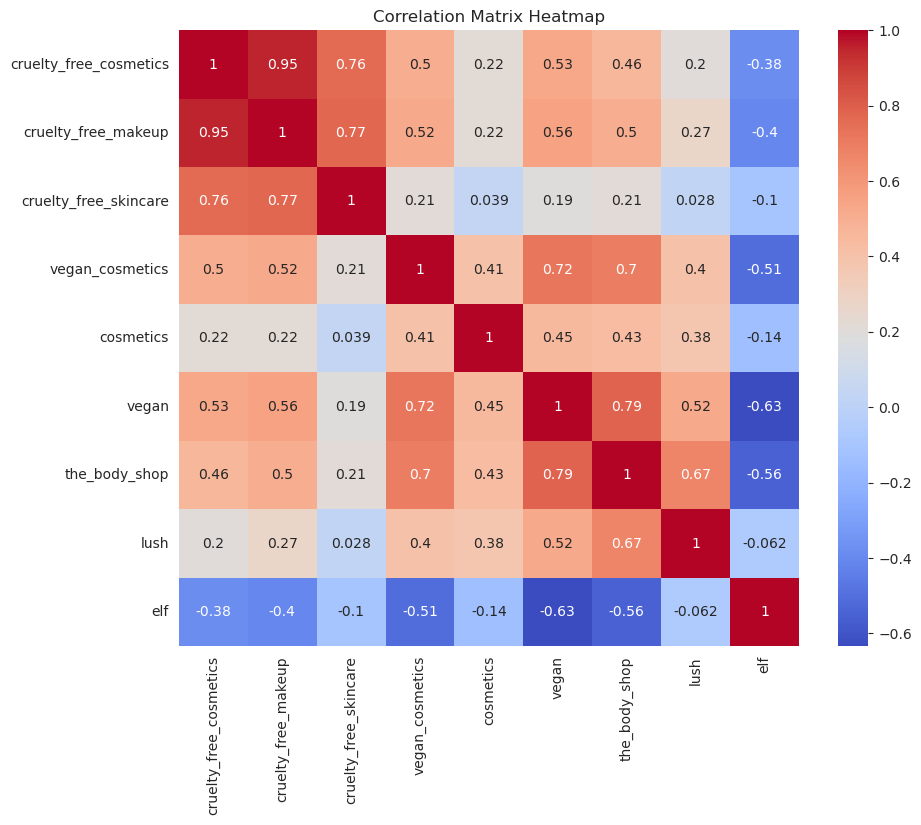

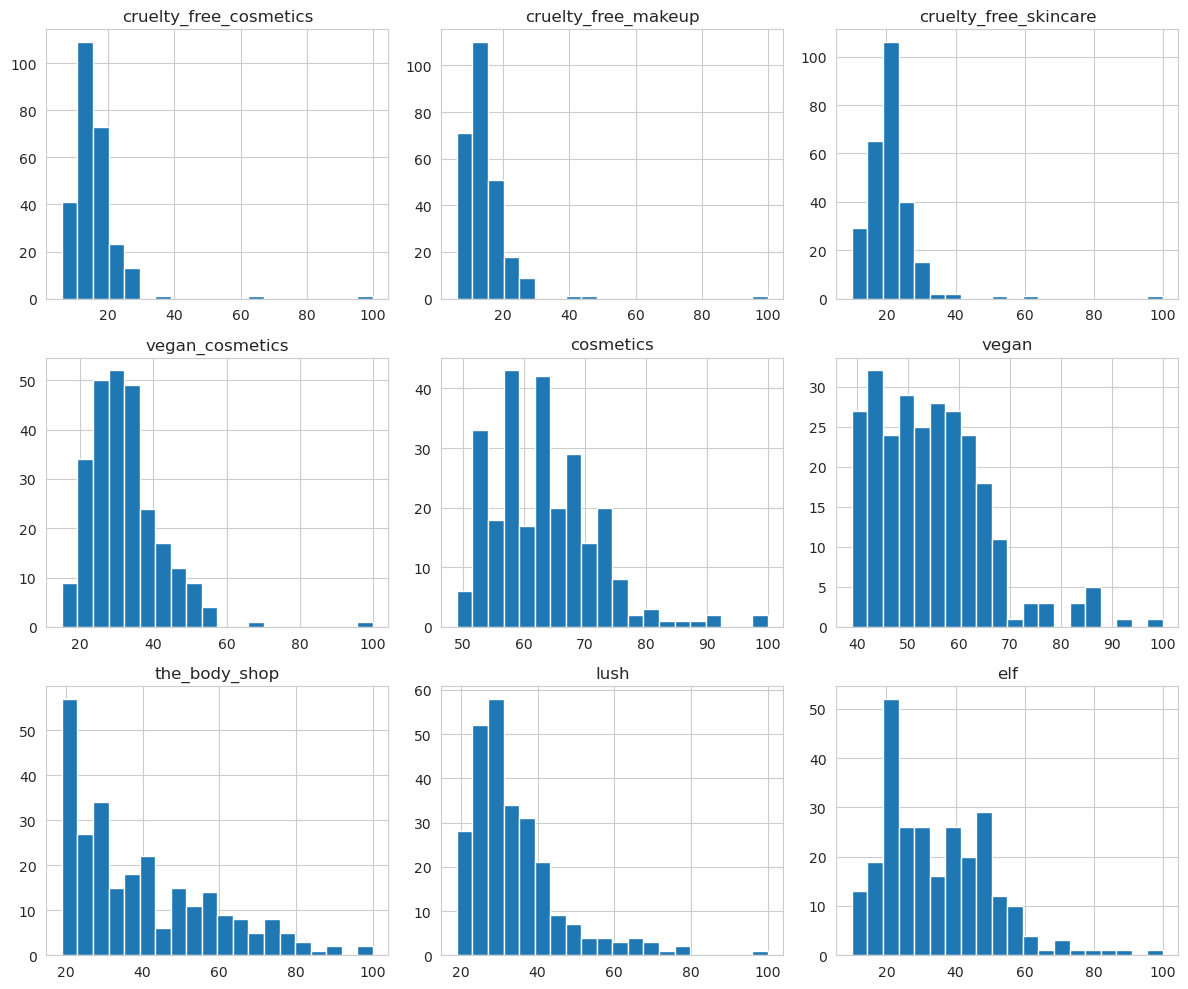

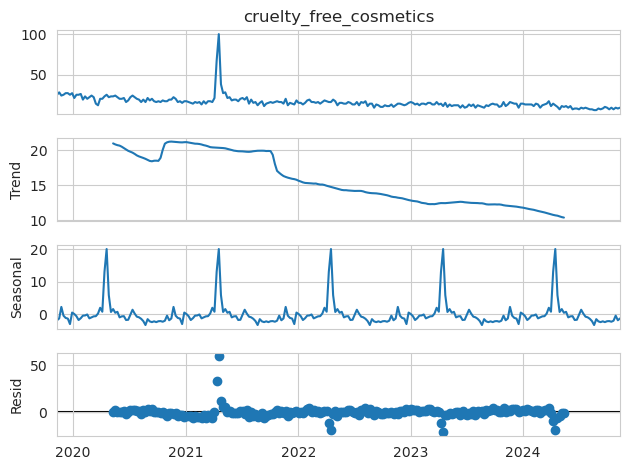

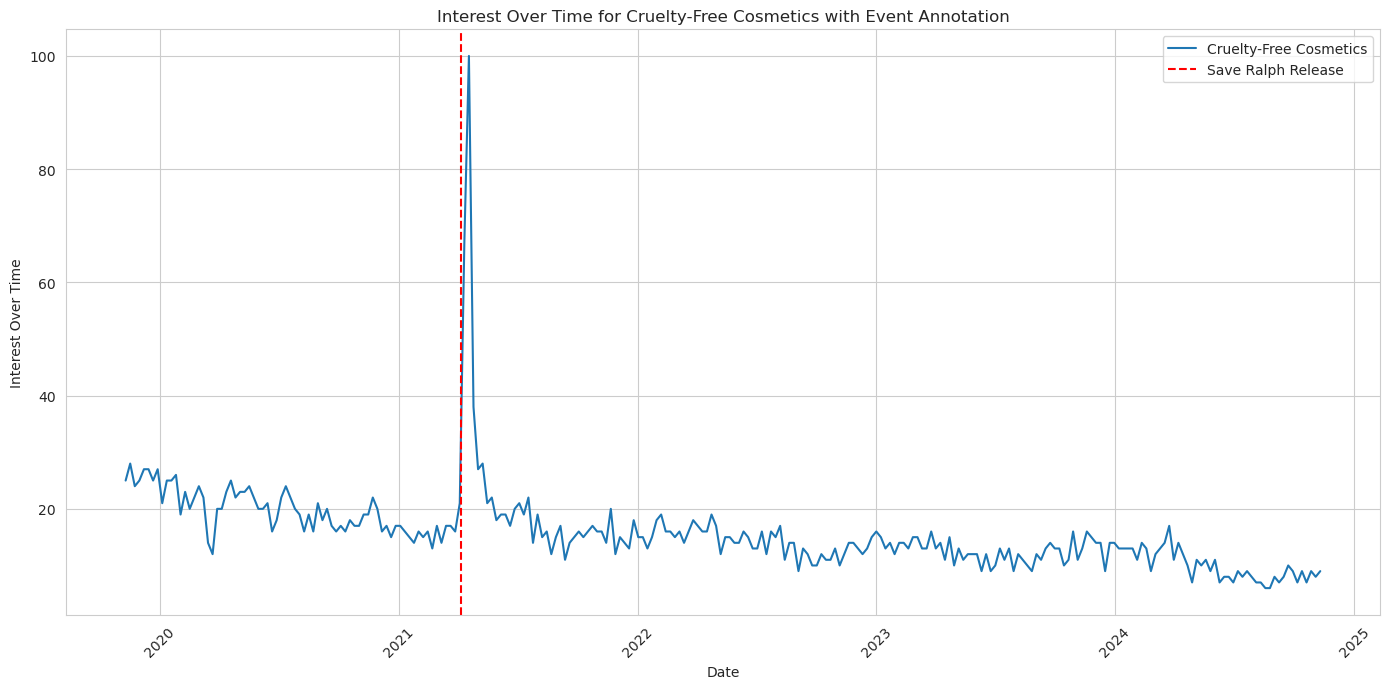

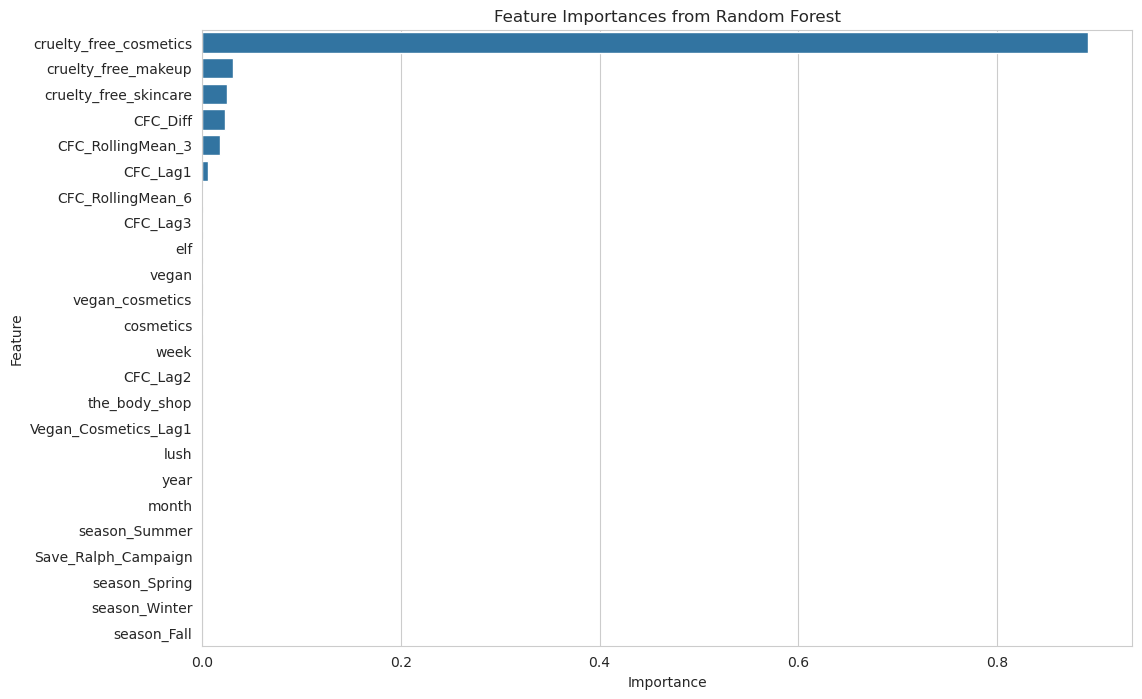

                   Feature    Importance
9   cruelty_free_cosmetics  8.911537e-01
10     cruelty_free_makeup  3.118766e-02
11   cruelty_free_skincare  2.484212e-02
0                 CFC_Diff  2.311021e-02
4        CFC_RollingMean_3  1.792612e-02
1                 CFC_Lag1  5.881739e-03
5        CFC_RollingMean_6  1.165326e-03
3                 CFC_Lag3  1.084299e-03
12                     elf  7.407125e-04
20                   vegan  6.194990e-04
21         vegan_cosmetics  5.648466e-04
8                cosmetics  4.834902e-04
22                    week  4.326372e-04
2                 CFC_Lag2  3.147042e-04
19           the_body_shop  1.818070e-04
7     Vegan_Cosmetics_Lag1  1.775718e-04
13                    lush  6.027862e-05
23                    year  4.668842e-05
14                   month  9.643772e-06
17           season_Summer  9.221120e-06
6      Save_Ralph_Campaign  4.498206e-06
16           season_Spring  3.177917e-06
18           season_Winter  1.722462e-16
15             s

/home/nevin/anaconda3/envs/cruelty-free-cosmetics/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/home/nevin/anaconda3/envs/cruelty-free-cosmetics/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/home/nevin/anaconda3/envs/cruelty-free-cosmetics/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing 'CFC_Diff' with VIF = inf
Removing 'CFC_Lag1' with VIF = inf
Removing 'CFC_RollingMean_3' with VIF = 239.0433010243741
Removing 'vegan' with VIF = 183.7066169900055
Removing 'CFC_RollingMean_6' with VIF = 107.66861102000865
Removing 'year' with VIF = 99.38087520478089
Removing 'cruelty_free_makeup' with VIF = 61.03275321766698
Removing 'cosmetics' with VIF = 51.68962683190058
Removing 'month' with VIF = 33.38942431621272
Removing 'cruelty_free_skincare' with VIF = 29.40807178578718
Removing 'the_body_shop' with VIF = 28.252518720302152
Removing 'Vegan_Cosmetics_Lag1' with VIF = 22.552114573205426
Removing 'vegan_cosmetics' with VIF = 19.729819142583096
Removing 'lush' with VIF = 16.010379879980754
Removing 'CFC_Lag2' with VIF = 10.933602585360045
All VIF values are below the threshold.

Final VIF DataFrame:
                  Feature       VIF
0                CFC_Lag3  5.045999
1     Save_Ralph_Campaign  1.463148
2  cruelty_free_cosmetics  5.315390
3                     elf  3

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from scipy.stats import shapiro
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
sns.set_style('whitegrid')  # Set seaborn style globally


# ## STEP 1. Data Collection

# Load the data files
df_cfc = pd.read_csv('cruelty_free_data/cruelty_free_cosmetics.csv')
df_cfm = pd.read_csv('cruelty_free_data/cruelty_free_makeup.csv')
df_cfs = pd.read_csv('cruelty_free_data/cruelty_free_skincare.csv')
df_vc = pd.read_csv('cruelty_free_data/vegan_cosmetics.csv')
df_cosmetics = pd.read_csv('cruelty_free_data/cosmetics.csv')
df_vegan = pd.read_csv('cruelty_free_data/vegan.csv')
df_tbs = pd.read_csv('cruelty_free_data/the_body_shop.csv')
df_lush = pd.read_csv('cruelty_free_data/lush.csv')
df_elf = pd.read_csv('cruelty_free_data/elf_cosmetics.csv')


print("Cruelty-Free Cosmetics Data:")
print(df_cfc.head(), "\n")

print("Cruelty-Free Makeup Data:")
print(df_cfm.head(), "\n")

print("Cruelty-Free Skincare Data:")
print(df_cfs.head(), "\n")

print("Vegan Cosmetics Data:")
print(df_vc.head(), "\n")

print("Cosmetics Data:")
print(df_cosmetics.head(), "\n")

print("Vegan Data:")
print(df_vegan.head(), "\n")

print("The Body Shop Data:")
print(df_tbs.head(), "\n")

print("Lush Data:")
print(df_lush.head(), "\n")

print("E.L.F Data:")
print(df_elf.head(), "\n")


# ## STEP 2. Data Preparation and Cleaning


#Rename Columns
# For "cruelty_free_cosmetics.csv"
df_cfc.rename(columns={'Week': 'date', 'cruelty free cosmetics: (Worldwide)': 'cruelty_free_cosmetics'}, inplace=True)

# For "cruelty_free_makeup.csv"
df_cfm.rename(columns={'Week': 'date', 'cruelty free makeup: (Worldwide)': 'cruelty_free_makeup'}, inplace=True)

# For "cruelty_free_skincare.csv"
df_cfs.rename(columns={'Week': 'date', 'cruelty free skincare: (Worldwide)': 'cruelty_free_skincare'}, inplace=True)

# For "vegan_cosmetics.csv"
df_vc.rename(columns={'Week': 'date', 'vegan cosmetics: (Worldwide)': 'vegan_cosmetics'}, inplace=True)

# For "cosmetics.csv"
df_cosmetics.rename(columns={'Week': 'date', 'cosmetics: (Worldwide)': 'cosmetics'}, inplace=True)

# For "vegan.csv"
df_vegan.rename(columns={'Week': 'date', 'vegan: (Worldwide)': 'vegan'}, inplace=True)

# For "the_body_shop.csv"
df_tbs.rename(columns={'Week': 'date', 'The Body Shop: (Worldwide)': 'the_body_shop'}, inplace=True)

# For "lush.csv"
df_lush.rename(columns={'Week': 'date', 'Lush: (Worldwide)': 'lush'}, inplace=True)

# For "elf_cosmetics.csv"
df_elf.rename(columns={'Week': 'date', 'E.L.F. cosmetics: (Worldwide)': 'elf'}, inplace=True)



#convert date column to datetime format
df_cfc['date'] = pd.to_datetime(df_cfc['date'])
df_cfm['date'] = pd.to_datetime(df_cfm['date'])
df_cfs['date'] = pd.to_datetime(df_cfs['date'])
df_vc['date'] = pd.to_datetime(df_vc['date'])
df_cosmetics['date'] = pd.to_datetime(df_cosmetics['date'])
df_vegan['date'] = pd.to_datetime(df_vegan['date'])
df_tbs['date'] = pd.to_datetime(df_tbs['date'])
df_lush['date'] = pd.to_datetime(df_lush['date'])
df_elf['date'] = pd.to_datetime(df_elf['date'])



#Merge data 
# Start by merging df_cfc and df_cfm
df_merged = pd.merge(df_cfc, df_cfm, on='date', how='inner')

# Merge df_cfs
df_merged = pd.merge(df_merged, df_cfs, on='date', how='inner')

# Merge df_vc
df_merged = pd.merge(df_merged, df_vc, on='date', how='inner')

# Merge df_cosmetics
df_merged = pd.merge(df_merged, df_cosmetics, on='date', how='inner')

# Merge df_vegan
df_merged = pd.merge(df_merged, df_vegan, on='date', how='inner')

# Merge df_tbs
df_merged = pd.merge(df_merged, df_tbs, on='date', how='inner')

# Merge df_lush
df_merged = pd.merge(df_merged, df_lush, on='date', how='inner')

# Merge df_elf
df_merged = pd.merge(df_merged, df_elf, on='date', how='inner')



print("First few rows of the merged DataFrame:")
print(df_merged.head(), "\n")

print("Columns in the merged DataFrame:")
print(df_merged.columns)




print(df_merged.describe())




#Handle missing data 
print("Missing values in the merged DataFrame:")
print(df_merged.isnull().sum())



# Sort the DataFrame by 'date'
df_merged.sort_values('date', inplace=True)
df_merged.reset_index(drop=True, inplace=True)




print("Data types in the merged DataFrame:")
print(df_merged.dtypes)




print("Final merged DataFrame preview:")
print(df_merged.head())




df_merged.to_csv('cruelty_free_data/merged_data.csv', index=False)


# ## Step 3: Exploratory Data Analysis (EDA)


print("The shape of the DataFrame is:", df_merged.shape)




print("Statistical summary of the data:")
print(df_merged.describe())


# ### Visualizing Trends Over Time


# Plot each keyword's interest over time
plt.figure(figsize=(14, 7))
plt.plot(df_merged['date'], df_merged['cruelty_free_cosmetics'], label='Cruelty-Free Cosmetics')
plt.plot(df_merged['date'], df_merged['cruelty_free_makeup'], label='Cruelty-Free Makeup')
plt.plot(df_merged['date'], df_merged['cruelty_free_skincare'], label='Cruelty-Free Skincare')
plt.plot(df_merged['date'], df_merged['vegan_cosmetics'], label='Vegan Cosmetics')
plt.plot(df_merged['date'], df_merged['cosmetics'], label='Cosmetics', linestyle='--', color='gray')
plt.plot(df_merged['date'], df_merged['vegan'], label='Vegan', linestyle='--', color='green')
plt.plot(df_merged['date'], df_merged['the_body_shop'], label='The Body Shop', linestyle='--', color='purple')
plt.plot(df_merged['date'], df_merged['lush'], label='Lush', linestyle='--', color='black')
plt.plot(df_merged['date'], df_merged['elf'], label='E.L.F.', linestyle='--', color='yellow')
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Interest Over Time')
plt.title('Interest Over Time for Keywords')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ### 3.3. Correlation Analysis


# Exclude the 'Date' column for correlation
correlation_matrix = df_merged.drop('date', axis=1).corr()
print("Correlation matrix:")
print(correlation_matrix)




# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# ### 3.4. Distribution of Variables
# Understanding the distribution can help in selecting appropriate models and transformations.



df_merged.drop('date', axis=1).hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


# ## 3.5. Seasonal Decomposition



from statsmodels.tsa.seasonal import seasonal_decompose

# Set the 'Date' as the index
df_ts = df_merged.set_index('date')

# Perform decomposition (assuming weekly data with a yearly seasonality of 52 weeks)
decomposition = seasonal_decompose(df_ts['cruelty_free_cosmetics'], model='additive', period=52)

# Plot the decomposition
decomposition.plot()
plt.show()


# ## 3.6. Identify Key Events 



plt.figure(figsize=(14, 7))
plt.plot(df_merged['date'], df_merged['cruelty_free_cosmetics'], label='Cruelty-Free Cosmetics')

# Add a vertical line at the date of the event
event_date = pd.to_datetime('2021-04-06')
plt.axvline(x=event_date, color='red', linestyle='--', label='Save Ralph Release')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Interest Over Time')
plt.title('Interest Over Time for Cruelty-Free Cosmetics with Event Annotation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ## Step 4: Feature Engineering and Selection
# 



df_merged['month'] = df_merged['date'].dt.month
df_merged['year'] = df_merged['date'].dt.year
df_merged['week'] = df_merged['date'].dt.isocalendar().week



def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df_merged['season'] = df_merged['month'].apply(get_season)

df_merged = pd.get_dummies(df_merged, columns=['season'])




df_merged['CFC_Lag1'] = df_merged['cruelty_free_cosmetics'].shift(1)
df_merged['CFC_Lag2'] = df_merged['cruelty_free_cosmetics'].shift(2)
df_merged['CFC_Lag3'] = df_merged['cruelty_free_cosmetics'].shift(3)

df_merged['Vegan_Cosmetics_Lag1'] = df_merged['vegan_cosmetics'].shift(1)

df_merged['CFC_RollingMean_3'] = df_merged['cruelty_free_cosmetics'].rolling(window=3).mean()
df_merged['CFC_RollingMean_6'] = df_merged['cruelty_free_cosmetics'].rolling(window=6).mean()

df_merged['CFC_Diff'] = df_merged['cruelty_free_cosmetics'].diff()



# Dates during which the campaign was most active
df_merged['Save_Ralph_Campaign'] = df_merged['date'].apply(
    lambda x: 1 if pd.to_datetime('2021-04-06') <= x <= pd.to_datetime('2021-05-31') else 0
)

df_merged.dropna(inplace=True)


# ## Log transformation


# Apply log transformation to the target variable before feature selection
df_merged['cruelty_free_cosmetics_log'] = np.log1p(df_merged['cruelty_free_cosmetics'])



# Define target variable
y = df_merged['cruelty_free_cosmetics_log']
#y = df_merged['vegan_cosmetics_log']
# Define features (exclude 'Date' and 'Cruelty_Free_Cosmetics')
feature_columns = df_merged.columns.difference(['date', 'cruelty_free_cosmetics_log'])
X = df_merged[feature_columns]


# ### 4.2 Feature Importance Using Random Forest



# Initialize and Train Random Forest
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame
feature_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# Sort by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)



plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()



# Convert to DataFrame
df_fi = pd.DataFrame(feature_importances)

# Display the DataFrame
print(df_fi)



# Select numeric features
X_numeric = X.select_dtypes(include=[np.number]).copy()

# Inspect data
print("Data Types:\n", X_numeric.dtypes)
print("\nMissing Values:\n", X_numeric.isnull().sum())
print("\nInfinite Values Present:", np.isinf(X_numeric).values.any())

# Replace infinite values with NaN
X_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)


# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)
X_numeric = X_numeric_imputed

# Ensure all data is float
X_numeric = X_numeric.astype(float)

# Verify no missing or infinite values remain
print("\nAfter Cleaning:")
print("Missing Values:\n", X_numeric.isnull().sum())
print("Infinite Values Present:", np.isinf(X_numeric).values.any())
print("Data Types:\n", X_numeric.dtypes)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_numeric.columns
vif_data['VIF'] = [
    variance_inflation_factor(X_numeric.values, i) 
    for i in range(len(X_numeric.columns))
]

print("\nVIF Results:")
print(vif_data)


# ## 4.4. Prepare Final Feature Set



selected_features = feature_importances['Feature'].tolist()
selected_features




# Create 'df_final' by selecting the chosen features
df_final = df_merged[selected_features]
df_final




# List of features with infinite VIFs
features_to_remove_inf = ['CFC_Diff', 'CFC_Lag1', 'CFC_Lag2', 'CFC_RollingMean_3','cruelty_free_cosmetics']

# Drop these features from df_final
df_final = df_final.drop(columns=features_to_remove_inf)

# Update the selected_features list
selected_features = [feature for feature in selected_features if feature not in features_to_remove_inf]



df_final.columns




max_vif_threshold = 10  # Define your acceptable VIF threshold

while True:
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_numeric.columns
    vif_data['VIF'] = [
        variance_inflation_factor(X_numeric.values, i) 
        for i in range(len(X_numeric.columns))
    ]
    
    max_vif = vif_data['VIF'].max()
    if max_vif > max_vif_threshold:
        feature_to_remove = vif_data.loc[vif_data['VIF'] == max_vif, 'Feature'].values[0]
        print(f"Removing '{feature_to_remove}' with VIF = {max_vif}")
        X_numeric = X_numeric.drop(columns=[feature_to_remove])
    else:
        print("All VIF values are below the threshold.")
        break

print("\nFinal VIF DataFrame:")
print(vif_data)




# Select features based on previous VIF analysis
selected_features = ['CFC_Lag3','Save_Ralph_Campaign','cruelty_free_cosmetics', 'elf', 'week']




X_final = X[selected_features]
len(X_final)



# Prepare feature matrix and target vector
X_final = df_merged[selected_features]
y = df_merged['cruelty_free_cosmetics_log']

# Determine split index for 80% training data
split_fraction = 0.8
split_index = int(len(X_final) * split_fraction)  # 0.8 * 257 ≈ 206


# Split the data into training and testing sets
X_train = X_final.iloc[:split_index]
y_train = y.iloc[:split_index]

X_test = X_final.iloc[split_index:]
y_test = y.iloc[split_index:]

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

# Save the split datasets
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Data splitting completed. Training and testing datasets saved to files.")